### v4, epochs 500

In [1]:
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


## Project: 🌿Cotton Plant Disease Prediction & Get Cure App

In [5]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

In [6]:
keras.__version__

'2.4.3'

In [7]:
train_data_path = "/drive/My Drive/cotton/train"
validation_data_path = "/drive/My Drive/cotton/val"


In [8]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [9]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [10]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [11]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 332 images belonging to 4 classes.


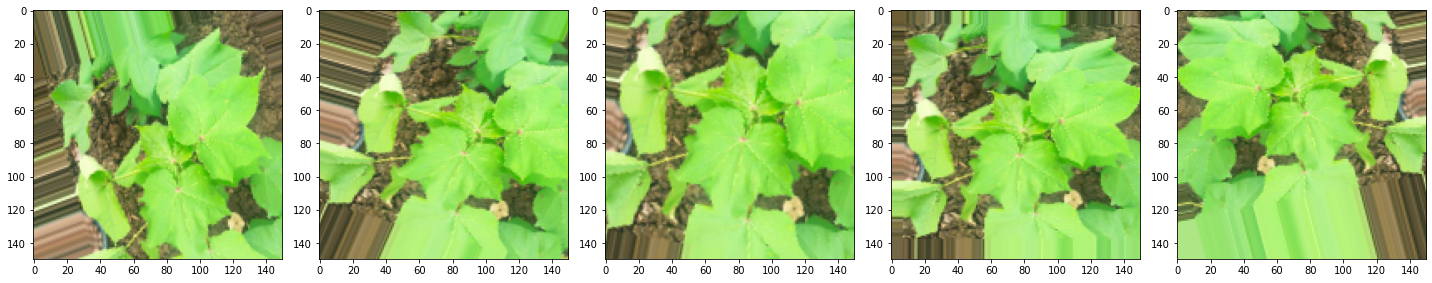

In [12]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [13]:
# save best model using vall accuracy
model_path = '/drive/My Drive/cotton/cotton_pant_disease_prediction_ai/model/v4_pred_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [14]:

#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [15]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

In [25]:
model_path2 = '/drive/My Drive/cotton/cotton_pant_disease_prediction_ai/model/v4_pred_cott_dis.h5'
cnn_model.save(model_path2)

INFO:tensorflow:Assets written to: /drive/My Drive/cotton/cotton_pant_disease_prediction_ai/model/v4_pred_cott_dis.pkl/assets


In [48]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/drive/My Drive/cotton/cotton_pant_disease_prediction_ai/model/v4_pred_cott_dis.h5')

In [49]:
def pred_cot_dieas(cott_plant):
  test_image = load_img(cott_plant, target_size = (150, 150)) # load image 
  
  test_image = img_to_array(test_image)/255 # convert image to np array and normalize
  test_image = np.expand_dims(test_image, axis = 0) # change dimention 3D to 4D
  
  result = new_model.predict(test_image).round(3) # predict diseased palnt or not
  
  pred = np.argmax(result) # get the index of max value
  if pred == 0:
    return "Diseased Cotton leaf"
  elif pred == 1:
      return 'diseased cotton plant'
  elif pred == 2:
      return 'Healthy cotton leaf'
  else:
    return "Healthy Cotton Plant"

In [44]:
file_path  = "/drive/My Drive/cotton/test/diseased cotton leaf/dis_leaf (124).jpg"

In [50]:
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
pred = pred_cot_dieas(cott_plant=file_path)

In [51]:
print(pred)

Diseased Cotton leaf


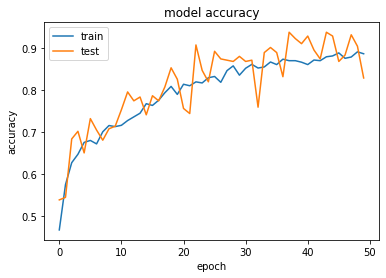

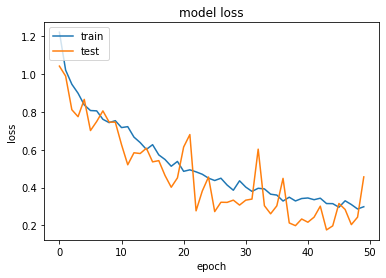

In [17]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history.history